In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
os.chdir('..')

In [3]:
df = pd.read_csv("times.txt", sep=" ", header=None, names=["words", "times_fst", "times_bin"])
df['len'] = df['words'].str.len()
df.head()

,words,times_fst,times_bin,len
0,no,245,2,2
1,h,1178,0,1
2,Mohamme,8,0,7
3,lac,26,0,3
4,dioxi,5,0,5


In [4]:
df.describe()

,times_fst,times_bin,len
count,10000.000000,10000.000000,10000.000000
mean,109.393500,0.003200,4.244100
std,260.444351,0.127245,2.608524
min,0.000000,0.000000,1.000000
25%,1.000000,0.000000,2.000000
50%,3.000000,0.000000,4.000000
75%,56.250000,0.000000,6.000000
max,2675.000000,8.000000,17.000000


<Axes: xlabel='times_fst', ylabel='Count'>

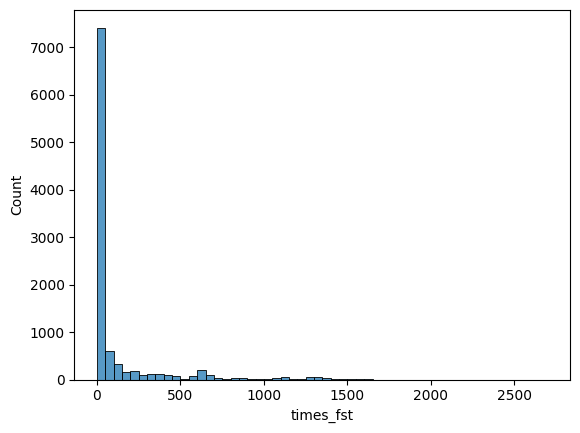

In [5]:
sns.histplot(df["times_fst"], binwidth=50)

<Axes: >

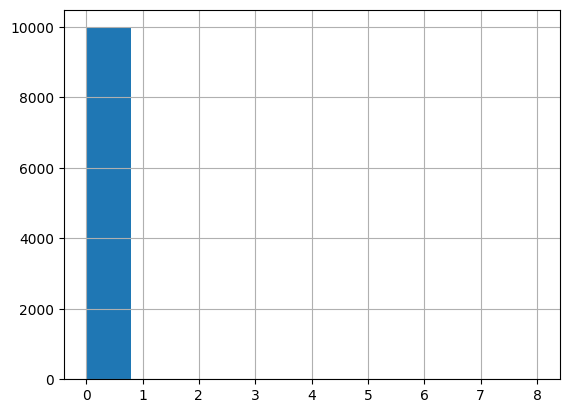

In [15]:
df["times_bin"].hist()

In [16]:
df_by_len = df.groupby("len")[["times_fst", "times_bin"]].describe()
df_by_len

times_fst                                                              \
        count        mean         std  min     25%    50%     75%     max   
len                                                                         
1      1568.0  577.698342  393.473716  8.0  253.75  563.5  728.50  2675.0   
2      1548.0   98.140827  101.197048  0.0   31.00   72.0  115.00   927.0   
3      1433.0   16.203768   23.122405  0.0    4.00    8.0   20.00   204.0   
4      1346.0    4.409361    6.333216  0.0    1.00    2.0    5.00    66.0   
5      1183.0    2.325444    4.000815  0.0    1.00    1.0    2.00    68.0   
6       961.0    1.631634    1.781151  0.0    1.00    1.0    2.00    25.0   
7       722.0    1.475069    1.327220  0.0    1.00    1.0    2.00    19.0   
8       519.0    1.348748    1.264206  0.0    1.00    1.0    2.00    19.0   
9       327.0    1.308869    1.137488  0.0    1.00    1.0    2.00    18.0   
10      186.0    1.279570    0.576393  0.0    1.00    1.0    2.00     3.0   
11      126.0    1.246032    0.602482  0.0    1.00    1.0    1.00     5.0   
12       50.0    1.480000    0.646498  1.0    1.00    1.0    2.00     4.0   
13       23.0    1.565217    1.502304  1.0    1.00    1.0    1.50     8.0   
14        5.0    1.000000    0.000000  1.0    1.00    1.0    1.00     1.0   
15        1.0    2.000000         NaN  2.0    2.00    2.0    2.00     2.0   
17        2.0    1.500000    0.707107  1.0    1.25    1.5    1.75     2.0   

    times_bin                                               
        count      mean       std  min  25%  50%  75%  max  
len                                                         
1      1568.0  0.008291  0.209677  0.0  0.0  0.0  0.0  8.0  
2      1548.0  0.001938  0.056818  0.0  0.0  0.0  0.0  2.0  
3      1433.0  0.009770  0.244868  0.0  0.0  0.0  0.0  7.0  
4      1346.0  0.000743  0.027257  0.0  0.0  0.0  0.0  1.0  
5      1183.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
6       961.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
7       722.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
8       519.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
9       327.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
10      186.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
11      126.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
12       50.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
13       23.0  0.043478  0.208514  0.0  0.0  0.0  0.0  1.0  
14        5.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
15        1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
17        2.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0

In [17]:
df1 = df[["times_fst", "len"]]
df2 = df[["times_bin", "len"]]
df1.columns = ["times", "len"]
df2.columns = ["times", "len"]
df1["method"] = "fst"
df2["method"] = "bin"
#Vertical concat
df_concat = pd.concat([df1, df2], axis=0)

/tmp/ipykernel_67035/1809382971.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["method"] = "fst"
/tmp/ipykernel_67035/1809382971.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["method"] = "bin"


<Axes: xlabel='len'>

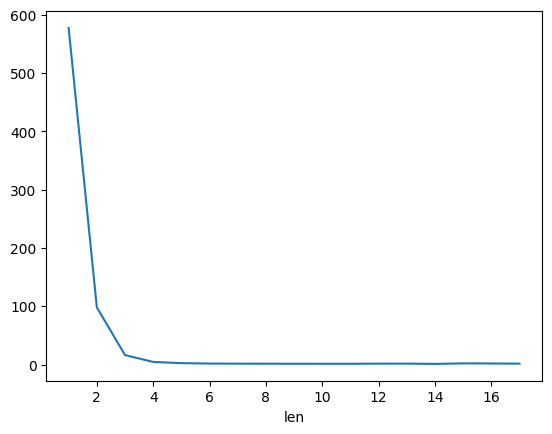

In [18]:
df_by_len["times_fst"]["mean"].plot()

<Axes: xlabel='len'>

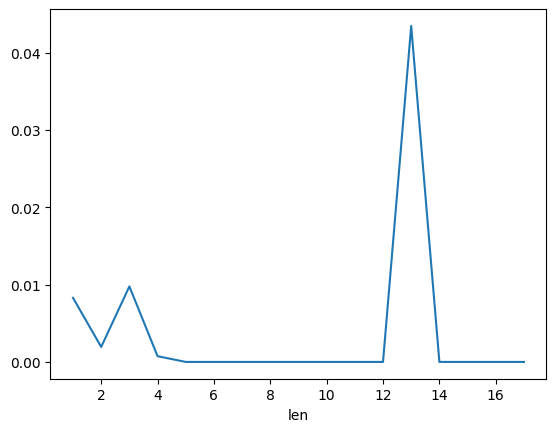

In [19]:
df_by_len["times_bin"]["mean"].plot()

/home/stelios/.virtualenvs/ita/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


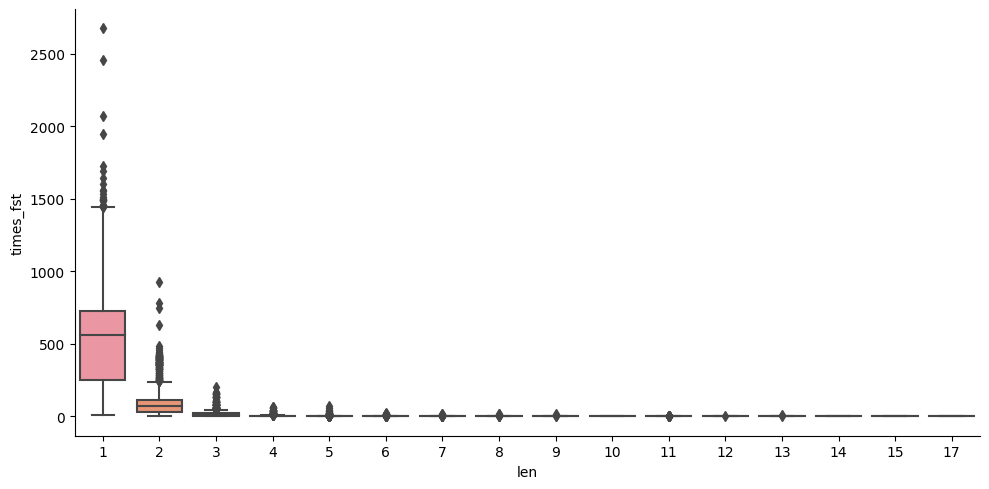

In [11]:
sns.catplot(x="len", y="times_fst", data=df, kind="box", aspect=2)

/home/stelios/.virtualenvs/ita/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


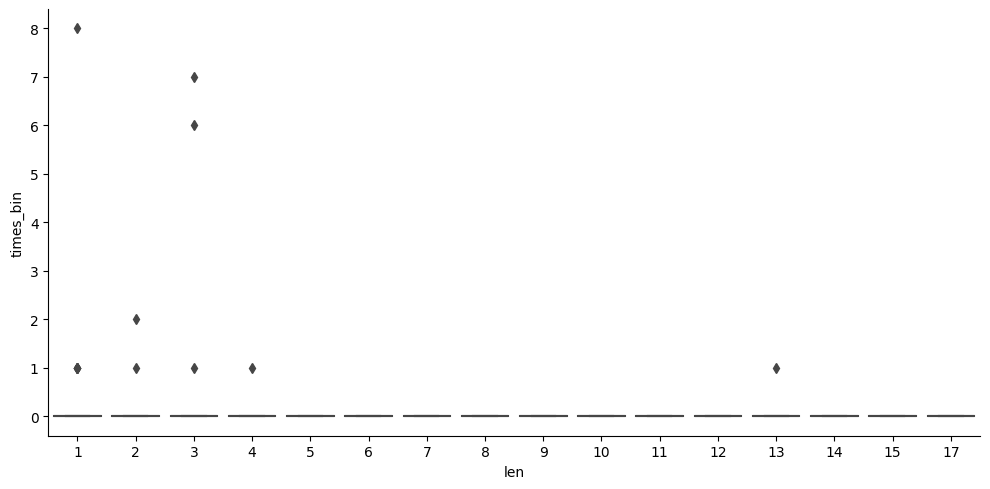

In [12]:
sns.catplot(x="len", y="times_bin", data=df, kind="box", aspect=2)

/home/stelios/.virtualenvs/ita/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


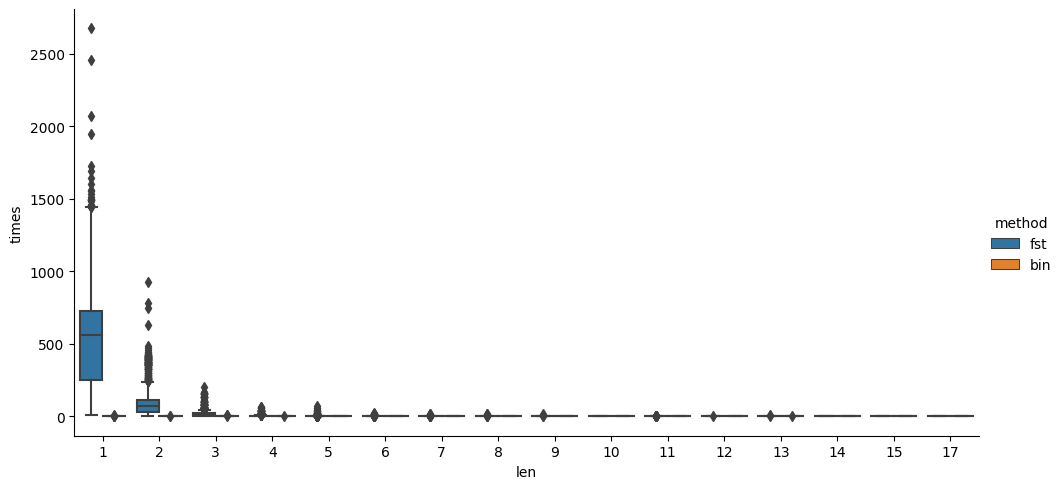

In [13]:
sns.catplot(x="len", y="times", data=df_concat, kind="box", aspect=2, hue="method")